In [1]:
import pandas as pd

In [2]:
#reading in the tv show files and adding them to one data frame together
amazon_tv = pd.read_csv("./AmazonTvShows.csv")
hulu_tv = pd.read_csv('./Hulu_tv_shows.csv')
netflix_tv = pd.read_csv('netflix_tv.csv')
disneyplus_tv = pd.read_csv('disneyplus_tv.csv')
amazon_tv

,type,title,release_year,rating,listed_in,streaming_platform,duration_seasons
0,TV Show,Wipeout Canada,2011,ALL,"Comedy, Documentary, Unscripted",Amazon Prime,1
1,TV Show,Zoo Babies,2008,ALL,"Kids, Special Interest",Amazon Prime,1
2,TV Show,Zoë Coombs Marr: Bossy Bottom,2020,18+,"Comedy, Talk Show and Variety",Amazon Prime,1
3,TV Show,Zoboomafoo,2001,TV-Y,Kids,Amazon Prime,1
4,TV Show,Zo Zo Zombie: Mini-Series,2020,TV-Y7,"Action, Anime, Comedy",Amazon Prime,1
...,...,...,...,...,...,...,...
1670,TV Show,Lunkerville,2021,13+,"Documentary, Special Interest, Sports",Amazon Prime,2
1671,TV Show,Let's Go Cozy Coupe! - Cartoons for Kids,2021,ALL,Kids,Amazon Prime,1
1672,TV Show,Glass Room,2019,16+,Drama,Amazon Prime,1
1673,TV Show,Terrahawks,1983,ALL,TV Shows,Amazon Prime,3


In [3]:
#joining all the tv dataframes together under one dataframe
tv_df = pd.concat([amazon_tv, hulu_tv,netflix_tv,disneyplus_tv], axis=0)

tv_df

,type,title,release_year,rating,listed_in,streaming_platform,duration_seasons,date_added
0,TV Show,Wipeout Canada,2011,ALL,"Comedy, Documentary, Unscripted",Amazon Prime,1,NaN
1,TV Show,Zoo Babies,2008,ALL,"Kids, Special Interest",Amazon Prime,1,NaN
2,TV Show,Zoë Coombs Marr: Bossy Bottom,2020,18+,"Comedy, Talk Show and Variety",Amazon Prime,1,NaN
3,TV Show,Zoboomafoo,2001,TV-Y,Kids,Amazon Prime,1,NaN
4,TV Show,Zo Zo Zombie: Mini-Series,2020,TV-Y7,"Action, Anime, Comedy",Amazon Prime,1,NaN
...,...,...,...,...,...,...,...,...
391,TV Show,X-Men: Evolution,2000,TV-Y7,"Action-Adventure, Animation, Kids",DisneyPlus,4,"November 12, 2019"
392,TV Show,Smart Guy,1996,TV-G,"Comedy, Coming of Age, Kids",DisneyPlus,3,"October 1, 2019"
393,TV Show,Disney Kirby Buckets,2014,TV-Y7,"Action-Adventure, Comedy, Coming of Age",DisneyPlus,3,"November 12, 2019"
394,TV Show,Disney Mech-X4,2016,TV-Y7,"Action-Adventure, Comedy, Science Fiction",DisneyPlus,2,"November 12, 2019"


In [4]:
#functions to create columns for genres
def action(listed):
    if 'Action' in listed:
        return 1
    else:
        return 0

def comedy(listed):
    if 'Comed' in listed:
        return 1
    else:
        return 0
    
def drama(listed):
    if 'Drama' in listed:
        return 1
    else:
        return 0
    
def family_kids(listed):
    if 'Kids' in listed:
        return 1
    elif 'Family' in listed:
        return 1
    else:
        return 0
def romance(listed):
    if 'Roman' in listed:
        return 1
    else:
        return 0  
def music(listed):
    if 'Music' in listed:
        return 1
    else:
        return 0 
def thriller(listed):
    if 'Thriller' in listed:
        return 1
    else:
        return 0 
def faith_spiritually(listed):
    if 'Faith' in listed:
        return 1
    else:
        return 0 
def documentary(listed):
    if 'Document' in listed:
        return 1
    else:
        return 0
def sci_fi_fantasy(listed):
    if 'Sci' in listed:
        return 1
    elif 'Fantasy' in listed:
        return 1
    else:
        return 0
    
def lgbtq(listed):
    if 'LGBTQ' in listed:
        return 1
    else:
        return 0
def black_stories(listed):
    if 'Black' in listed:
        return 1 
    else:
        return 0
def cooking_food(listed):
    if ("Cooking"  or "Food") in listed:
        return 1
    else:
        return 0
def reality(listed):
    if 'Reality' in listed:
        return 1
    else:
        return 0 
def sports(listed):
    if 'Sports' in listed:
        return 1
    else:
        return 0  
def anime(listed):
    if 'Anime' in listed:
        return 1
    else:
        return 0  


In [5]:
#applying categories to the tv dataframe for use in powerbi
tv_df['action'] = tv_df['listed_in'].apply(action)
tv_df['comedy'] = tv_df['listed_in'].apply(comedy)
tv_df['drama'] = tv_df['listed_in'].apply(drama)
tv_df['family_kids'] = tv_df['listed_in'].apply(family_kids)
tv_df['romance'] = tv_df['listed_in'].apply(romance)
tv_df['music'] = tv_df['listed_in'].apply(music)
tv_df['thriller'] = tv_df['listed_in'].apply(thriller)
tv_df['faith_spiritually'] = tv_df['listed_in'].apply(faith_spiritually)
tv_df['documentary'] = tv_df['listed_in'].apply(documentary)
tv_df['sci_fi_fantasy'] = tv_df['listed_in'].apply(sci_fi_fantasy)
tv_df['lgbtq'] = tv_df['listed_in'].apply(lgbtq)
tv_df['black_stories'] = tv_df['listed_in'].apply(black_stories)
tv_df['cooking_food'] = tv_df['listed_in'].apply(cooking_food)
tv_df['reality'] = tv_df['listed_in'].apply(reality)
tv_df['sports'] = tv_df['listed_in'].apply(sports)
tv_df['anime'] = tv_df['listed_in'].apply(anime)


In [6]:
#reading in the movie files and adding them to one data frame together
amazon_movies = pd.read_csv("./AmazonMovies.csv")
hulu_movies = pd.read_csv('./Hulu_movies.csv')
netflix_movies = pd.read_csv('netflix_movies.csv')
disneyplus_movies = pd.read_csv('disneyplus_movies.csv')


In [7]:
#joining all the movie dataframes together under one dataframe
movies_df = pd.concat([amazon_movies, hulu_movies,netflix_movies,disneyplus_movies], axis=0)

movies_df

,type,title,release_year,rating,listed_in,streaming_platform,duration_minutes,date_added
0,Movie,Take Care Good Night,2018,13+,"Drama, International",Amazon Prime,110.0,NaN
1,Movie,Zoombies,2016,13+,"Horror, Science Fiction",Amazon Prime,87.0,NaN
2,Movie,Zoe,2018,R,Science Fiction,Amazon Prime,104.0,NaN
3,Movie,Zis Boom Bah,1941,NR,"Arts, Entertainment, and Culture, Comedy, Drama",Amazon Prime,62.0,NaN
4,Movie,Zandalee,1991,R,Drama,Amazon Prime,94.0,NaN
...,...,...,...,...,...,...,...,...
1046,Movie,X-Men Origins: Wolverine,2009,PG-13,"Action-Adventure, Family, Science Fiction",DisneyPlus,108.0,"June 4, 2021"
1047,Movie,Night at the Museum: Battle of the Smithsonian,2009,PG,"Action-Adventure, Comedy, Family",DisneyPlus,106.0,"April 2, 2021"
1048,Movie,Eddie the Eagle,2016,PG-13,"Biographical, Comedy, Drama",DisneyPlus,107.0,"December 18, 2020"
1049,Movie,Bend It Like Beckham,2003,PG-13,"Buddy, Comedy, Coming of Age",DisneyPlus,112.0,"September 18, 2020"


In [8]:
#applying categories to the movies dataframe for use in powerbi
movies_df.loc[:,'action'] = movies_df['listed_in'].apply(action)
movies_df.loc[:,'comedy'] = movies_df['listed_in'].apply(comedy)
movies_df.loc[:,'drama'] = movies_df['listed_in'].apply(drama)
movies_df.loc[:,'family_kids'] = movies_df['listed_in'].apply(family_kids)
movies_df.loc[:,'romance'] = movies_df['listed_in'].apply(romance)
movies_df.loc[:,'music'] = movies_df['listed_in'].apply(music)
movies_df.loc[:,'thriller'] = movies_df['listed_in'].apply(thriller)
movies_df.loc[:,'faith_spiritually'] = movies_df['listed_in'].apply(faith_spiritually)
movies_df.loc[:,'documentary'] = movies_df['listed_in'].apply(documentary)
movies_df.loc[:,'sci_fi_fantasy'] = movies_df['listed_in'].apply(sci_fi_fantasy)
movies_df.loc[:,'lgbtq'] = movies_df['listed_in'].apply(lgbtq)
movies_df.loc[:,'black_stories'] = movies_df['listed_in'].apply(black_stories)
movies_df.loc[:,'cooking_food'] = movies_df['listed_in'].apply(cooking_food)
movies_df.loc[:,'sports'] = movies_df['listed_in'].apply(sports)
movies_df.loc[:,'anime'] = movies_df['listed_in'].apply(anime)

In [9]:
tv_df.to_csv('tv_shows.csv', index=False)
movies_df.to_csv('movies.csv', index=False)

In [10]:
#visualizations

import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
#descriptive statistics
print(movies_df.groupby('streaming_platform')['release_year'].mean())
print(movies_df.groupby('streaming_platform')['release_year'].median())

print(movies_df.groupby('streaming_platform')['duration_minutes'].mean())
print(movies_df.groupby('streaming_platform')['duration_minutes'].median())

streaming_platform
Amazon Prime    2006.145876
DisneyPlus      1999.212179
Hulu            2010.860310
Netflix         2013.120144
Name: release_year, dtype: float64
streaming_platform
Amazon Prime    2015.0
DisneyPlus      2008.0
Hulu            2016.0
Netflix         2016.0
Name: release_year, dtype: float64
streaming_platform
Amazon Prime    91.755797
DisneyPlus      71.928639
Hulu            99.042792
Netflix         99.584884
Name: duration_minutes, dtype: float64
streaming_platform
Amazon Prime    92.0
DisneyPlus      85.0
Hulu            97.0
Netflix         98.0
Name: duration_minutes, dtype: float64


In [13]:
import statsmodels.api as sm


In [14]:
x = movies_df['release_year']
y = movies_df['duration_minutes']
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

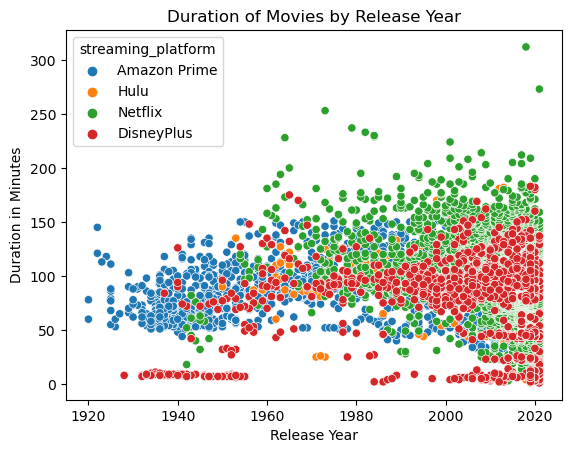

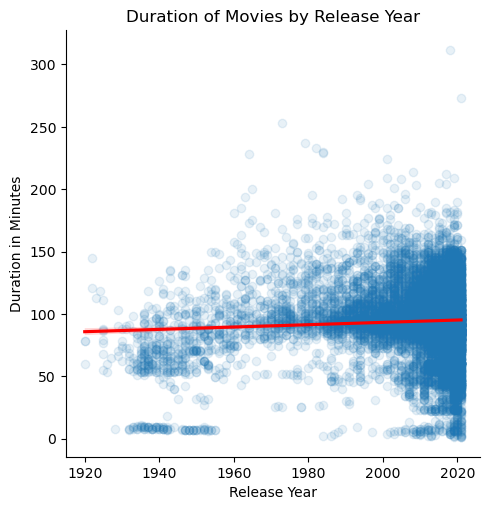

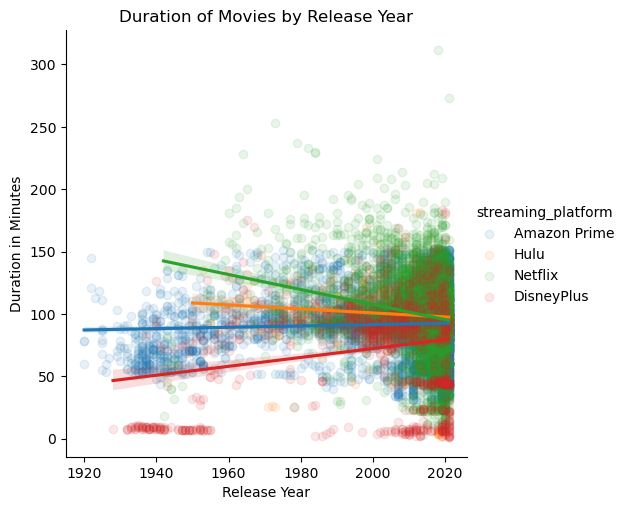

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       duration_minutes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     50.75
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.10e-12
Time:                        15:48:40   Log-Likelihood:                -70781.
No. Observations:               14893   AIC:                         1.416e+05
Df Residuals:                   14891   BIC:                         1.416e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -93.8234     26.370     -3.558      0.000    -145.511     -42.136
release_year     0.0935      0.013      7.124      0.000       0.068       0.119
==============================================================================
Omnibus:                      688.627   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2057.064
Skew:                          -0.183   Prob(JB):                         0.00
Kurtosis:                       4.783   Cond. No.                     2.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
plt.subplot()

sns.scatterplot(data=movies_df, x='release_year', y = 'duration_minutes', hue = 'streaming_platform')

plt.xlabel('Release Year')
plt.ylabel('Duration in Minutes')
plt.title('Duration of Movies by Release Year')


plt.subplot()
sns.lmplot(x='release_year',y= 'duration_minutes', data=movies_df, line_kws={'color': 'red'}, scatter_kws = {'alpha' : 0.1})
plt.xlabel('Release Year')
plt.ylabel('Duration in Minutes')
plt.title('Duration of Movies by Release Year')

plt.subplot()
#checking differents for each streaming platform compared to the total dataset
sns.lmplot(x='release_year',y= 'duration_minutes', data=movies_df, hue= 'streaming_platform',scatter_kws = {'alpha' : 0.1})
plt.xlabel('Release Year')
plt.ylabel('Duration in Minutes')
plt.title('Duration of Movies by Release Year')


plt.show()
model.summary()

In [ ]:
#looking at the graphs and model summary we can see that duration or length of movies is slightly increasing 
# the coefficent of the linear regression line is .0935 which considering the movies are generally 50-200 minutes
# long is a small increase.
#potential factors in this maybe the large increase in blockbuster movie lengths but an increase in the general 
#amount of movies to decrease that slope of that line. 

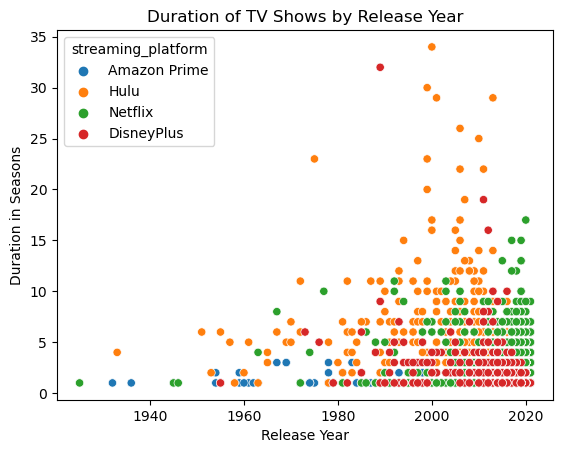

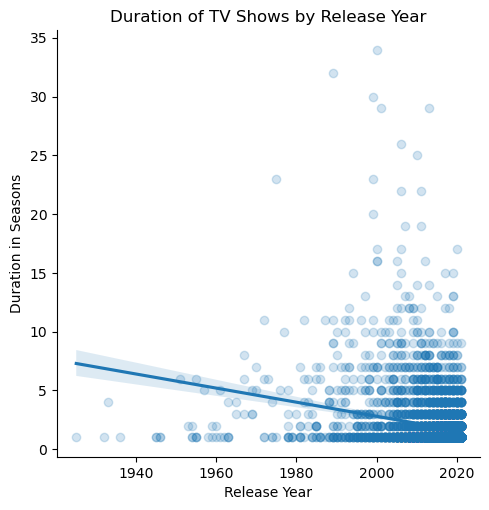

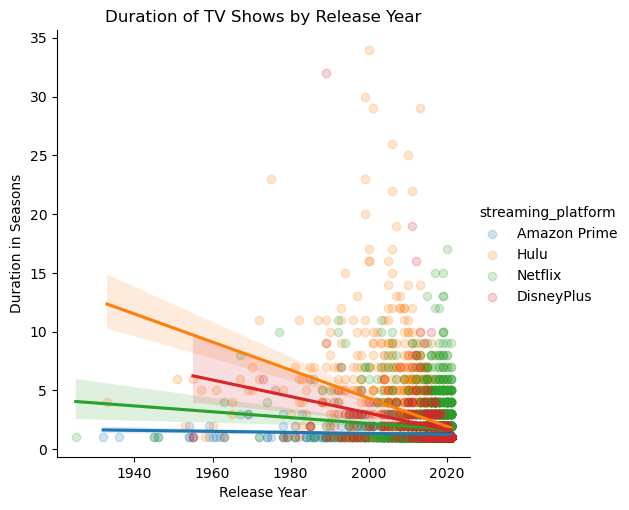

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       duration_seasons   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     358.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.29e-77
Time:                        15:49:46   Log-Likelihood:                -12966.
No. Observations:                6076   AIC:                         2.594e+04
Df Residuals:                    6074   BIC:                         2.595e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          122.5592      6.377     19.218      0.000     110.058     135.061
release_year    -0.0599      0.003    -18.920      0.000      -0.066      -0.054
==============================================================================
Omnibus:                     6479.529   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           631291.034
Skew:                           5.273   Prob(JB):                         0.00
Kurtosis:                      51.809   Cond. No.                     4.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#general look at the data for release v duration of show
plt.subplot()
sns.scatterplot(data=tv_df, x='release_year', y = 'duration_seasons', hue = 'streaming_platform')

plt.xlabel('Release Year')
plt.ylabel('Duration in Seasons')
plt.title('Duration of TV Shows by Release Year')

#looking at the general linear regression for duration by release year
plt.subplot()
sns.lmplot(x='release_year',y= 'duration_seasons', data=tv_df, scatter_kws = {'alpha' : 0.2})
plt.xlabel('Release Year')
plt.ylabel('Duration in Seasons')
plt.title('Duration of TV Shows by Release Year')


#checking differents for each streaming platform compared to the total dataset
plt.subplot()
sns.lmplot(x='release_year',y= 'duration_seasons', data=tv_df, scatter_kws = {'alpha' : 0.2}, hue = 'streaming_platform')
plt.xlabel('Release Year')
plt.ylabel('Duration in Seasons')
plt.title('Duration of TV Shows by Release Year')
plt.show()

x = tv_df['release_year']
y = tv_df['duration_seasons']
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()
model.summary()

In [ ]:
#Looking at the graphs and model summary we can see their is a negative regression (with a coefficent of -.06) 
#as release year increases. This means as time goes on the amount of seasons a show is given is 
#decreasing meaning shorter shows. One potential factor affecting this cause be the growth in streaming platforms 
#and the amount of shows being created. This would make this duration decrease for 
#multiple reasons including people moving onto new projects,or bad projects getting funded easily 
#and not succeeding and getting cancelled after one season.